# Imports

In [1]:
# -- Data & Plotting
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Progress Bar
from tqdm import tqdm, tnrange, tqdm_notebook
tqdm.pandas()

# -- RDKit
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem, Draw, PandasTools
from rdkit.Chem.Draw import IPythonConsole
PandasTools.RenderImagesInAllDataFrames()
print("RDKit Version: ", rdkit.__version__)

RDKit Version:  2024.03.5


In [2]:
# This will allow us to see all columns:
pd.set_option("display.max_columns", 100)

# To disable it, do:
# pd.reset_option("^display")

# To get details:
pd.get_option("display.max_columns")

# More information at:
# https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html#getting-and-setting-options

100

# Obtaining the database
Today we will be working with a database of compounds that wre somehow tested against the 
human cycloxoygenase-2 ([COX-2](https://en.wikipedia.org/wiki/Cyclooxygenase-2)), 
which is involved in pain and inflammation processes.
NSAIDS that selectively target COX-2 ([coxibs](https://en.wikipedia.org/wiki/Cyclooxygenase-2_inhibitor)) 
reduce the risk of peptic ulcers associated with the inhibition of a related enzyme, 
[COX-1](https://en.wikipedia.org/wiki/Cyclooxygenase-1).

We can obtain a database of compounds tested against COX-2 by searching different databases, 
the main ones being [PubChem](https://pubchem.ncbi.nlm.nih.gov/), maintained by the NIH,
and [ChEMBL](https://www.ebi.ac.uk/chembl/), maintained by the European Bioinformatics Institute.

Here, we will work with compounds obtained from the ChEMBL database. The process to obtain the database is the following:
1. Navigate to the [ChEMBL](https://www.ebi.ac.uk/chembl/) site, and search for "COX-2", **but don't hit enter yet!**
2. From the drop-down list, under "Targets", select "COX-2". That will return a page with different "COX-2" targets
3. Scroll down to the human COX-2 (CHEMBL230):
<a href="https://www.ebi.ac.uk/chembl/target_report_card/CHEMBL230/"><img src="./media/ChEMBL_COX-2.png" border=1 /></a> <br>
Clicking on the header will take you to the page with COX-2 data.
4. Finally,scroll to **"Activity Charts"**, and click on the **"Activity Types for CHEMBL230 (Cyclooxygenase-2)"** link:
<a href="https://www.ebi.ac.uk/chembl/web_components/explore/activities/STATE_ID:A7tQ9Eh8n8uuiWNfvBq-yw%3D%3D"><img src="./media/ChEMBL_COX-2_activities.png" border=1 /></a> <br>
It will take you to a list of 13,999 compounds (as of 08/28/2024) with measured activity against COX-2, 
which you can download as a CSV file by clicking the <img src="./media/ChEMBL_CSV.png" alt="CSV" /> button. 


<div class="alert alert-info" role="alert">
    Note: It may take a while. To speed up our class, the file is already available here in the data folder: `data/ChEMBL_COX-2_2024-08-28.csv`.
</div>


And we're ready to start exploring!

# Exploring the database
The CSV file from ChEMBL has a weird format, with ";" separating the columnns!

In [4]:
cox2db = pd.read_csv("data/ChEMBL_COX-2_2024-08-28.csv", sep=";")
cox2db.sample(5)

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,Standard Value,Standard Units,pChEMBL Value,Data Validity Comment,Comment,Uo Units,Ligand Efficiency BEI,Ligand Efficiency LE,Ligand Efficiency LLE,Ligand Efficiency SEI,Potential Duplicate,Assay ChEMBL ID,Assay Description,Assay Type,BAO Format ID,BAO Label,Assay Organism,Assay Tissue ChEMBL ID,Assay Tissue Name,Assay Cell Type,Assay Subcellular Fraction,Assay Parameters,Assay Variant Accession,Assay Variant Mutation,Target ChEMBL ID,Target Name,Target Organism,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties,Action Type,Standard Text Value
13974,CHEMBL271227,ABIRATERONE ACETATE,4.0,391.56,1.0,5.97,abiraterone acetate,CC(=O)O[C@H]1CC[C@@]2(C)C(=CC[C@@H]3[C@@H]2CC[...,AC50,'>',30000.00,nM,NaN,NaN,Summarised AC50 (mean value for measurements w...,UO_0000065,NaN,NaN,NaN,NaN,0,CHEMBL5291870,Compound was evaluated for inhibition of human...,F,BAO_0000019,assay format,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CHEMBL230,Cyclooxygenase-2,Homo sapiens,SINGLE PROTEIN,CHEMBL5291721,1,Scientific Literature,Nat Commun,2023.0,NaN,NaN,NaN,NaN
4025,CHEMBL1034,DICLOFENAC SODIUM,4.0,318.14,0.0,4.36,Diclofenac sodium,O=C([O-])Cc1ccccc1Nc1c(Cl)cccc1Cl.[Na+],Activity,'=',26.98,pg/ml,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,CHEMBL4770908,Inhibition of COX2 in LPS-stimulated human HT-...,B,BAO_0000221,tissue-based format,Homo sapiens,NaN,NaN,HT-29,NaN,NaN,NaN,NaN,CHEMBL230,Cyclooxygenase-2,Homo sapiens,SINGLE PROTEIN,CHEMBL4765344,1,Scientific Literature,Eur J Med Chem,2020.0,NaN,Dose = 300.0 microM | TIME = 48.0 hr,INHIBITOR,NaN
6172,CHEMBL28881,NaN,NaN,410.42,0.0,3.27,1u,CN(C)c1ccc(-c2cc(C(F)(F)F)nn2-c2ccc(S(N)(=O)=O...,IC50,'=',4.70,nM,8.33,NaN,NaN,UO_0000065,20.29,0.41,5.06,10.25,0,CHEMBL763093,In vitro inhibitory concentration required to ...,B,BAO_0000357,single protein format,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CHEMBL230,Cyclooxygenase-2,Homo sapiens,SINGLE PROTEIN,CHEMBL1130002,1,Scientific Literature,J Med Chem,1997.0,NaN,NaN,NaN,NaN
3323,CHEMBL4634634,NaN,NaN,365.44,0.0,1.44,29,C[C@@H]1C[C@H]1C(=O)N1CCN(c2cnc(C#N)c(-c3cnn(C...,Inhibition,'=',-24.00,%,NaN,Outside typical range,NaN,UO_0000187,NaN,NaN,NaN,NaN,0,CHEMBL4603433,Inhibition of recombinant full-length human CO...,B,BAO_0000219,cell-based format,Homo sapiens,NaN,NaN,Sf21,NaN,NaN,NaN,NaN,CHEMBL230,Cyclooxygenase-2,Homo sapiens,SINGLE PROTEIN,CHEMBL4602617,1,Scientific Literature,Bioorg Med Chem Lett,2020.0,CHEMBL4106362,NaN,NaN,NaN
97,CHEMBL358783,NaN,NaN,298.40,0.0,3.36,81,CCCCCCCS(=O)(=O)c1ccccc1OC(C)=O,IC50,'>',40000.00,nM,NaN,NaN,NaN,UO_0000065,NaN,NaN,NaN,NaN,0,CHEMBL760085,Inhibitory concentration in DMSO with purified...,B,BAO_0000357,single protein format,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CHEMBL230,Cyclooxygenase-2,Homo sapiens,SINGLE PROTEIN,CHEMBL1131194,1,Scientific Literature,J Med Chem,1998.0,NaN,NaN,NaN,NaN


That's a lot of stuff. This is the list of columns available:

In [5]:
cox2db.columns

Index(['Molecule ChEMBL ID', 'Molecule Name', 'Molecule Max Phase',
       'Molecular Weight', '#RO5 Violations', 'AlogP', 'Compound Key',
       'Smiles', 'Standard Type', 'Standard Relation', 'Standard Value',
       'Standard Units', 'pChEMBL Value', 'Data Validity Comment', 'Comment',
       'Uo Units', 'Ligand Efficiency BEI', 'Ligand Efficiency LE',
       'Ligand Efficiency LLE', 'Ligand Efficiency SEI', 'Potential Duplicate',
       'Assay ChEMBL ID', 'Assay Description', 'Assay Type', 'BAO Format ID',
       'BAO Label', 'Assay Organism', 'Assay Tissue ChEMBL ID',
       'Assay Tissue Name', 'Assay Cell Type', 'Assay Subcellular Fraction',
       'Assay Parameters', 'Assay Variant Accession', 'Assay Variant Mutation',
       'Target ChEMBL ID', 'Target Name', 'Target Organism', 'Target Type',
       'Document ChEMBL ID', 'Source ID', 'Source Description',
       'Document Journal', 'Document Year', 'Cell ChEMBL ID', 'Properties',
       'Action Type', 'Standard Text Value'],
 

In [6]:
cox2db.shape

(13999, 47)

## Unique molecules

The database has a total of 13,999 *entries*, which were collected from diverse sources. How many are really unique? We can check by the `ChEMBL ID`, which is an unique identifier for each molecule: 

In [7]:
len(cox2db['Molecule ChEMBL ID'].unique())

8582

From the total of 13,999 entries, only 8,582 have unique IDs. 

Furthermore, if we check the SMILES representations:

In [8]:
len(cox2db['Smiles'].unique())

8545

There seems to be some molecules with different IDs but the same SMILES!

Let's look at the repetitions of molecules with the same ID:

In [9]:
id_counts = cox2db['Molecule ChEMBL ID'].value_counts()
id_counts

Molecule ChEMBL ID
CHEMBL118        291
CHEMBL6          172
CHEMBL122         83
CHEMBL521         52
CHEMBL7162        36
                ... 
CHEMBL2105059      1
CHEMBL1201338      1
CHEMBL521686       1
CHEMBL708          1
CHEMBL1697733      1
Name: count, Length: 8582, dtype: int64

Some molecules appear in various experiments. For example, Celecoxib ([CHEMBL118](https://www.ebi.ac.uk/chembl/compound_report_card/CHEMBL118/)) is a reference in many studies.

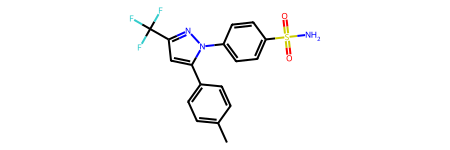

In [10]:
Chem.MolFromSmiles(cox2db[ cox2db['Molecule ChEMBL ID'] == 'CHEMBL118']['Smiles'].unique()[0])

## Example: Celecoxib (CHEMBL118)

It is likely that the repetitions mean different assays. Especially, some common known COX-2 inhibitors are used in many assays as reference. For example, Celecoxib ([CHEMBL118](https://www.ebi.ac.uk/chembl/compound_report_card/CHEMBL118/)) appears in 287 different assays of 10 different types:

In [11]:
len(cox2db[ cox2db['Molecule ChEMBL ID'] == 'CHEMBL118']['Assay ChEMBL ID'].unique())

287

In [12]:
cox2db[ cox2db['Molecule ChEMBL ID'] == 'CHEMBL118']['Standard Type'].value_counts()

Standard Type
IC50          209
Inhibition     66
Activity        8
Ki              2
Delta G         1
Ka              1
FC              1
INH             1
AC50            1
T1/2            1
Name: count, dtype: int64

### $IC_{50}s$

Most values (209) are for IC50, which is notoriously imprecise. Note the variation in values:

In [13]:
cox2db[ (cox2db['Molecule ChEMBL ID'] == 'CHEMBL118') & (cox2db['Standard Type'] == 'IC50')]["Standard Value"].describe()

count       209.000000
mean       4257.572967
std       40029.361475
min           0.520000
25%          40.000000
50%         100.000000
75%         440.000000
max      430000.000000
Name: Standard Value, dtype: float64

First, let's check how many different units are used:

In [14]:
cox2db[ (cox2db['Molecule ChEMBL ID'] == 'CHEMBL118') & (cox2db['Standard Type'] == 'IC50')]["Standard Units"].unique()

array(['nM'], dtype=object)

Good... At least it seems to have only one unit reported. So, let's take a look into the results:

[Text(0.5, 0, 'IC50 Value')]

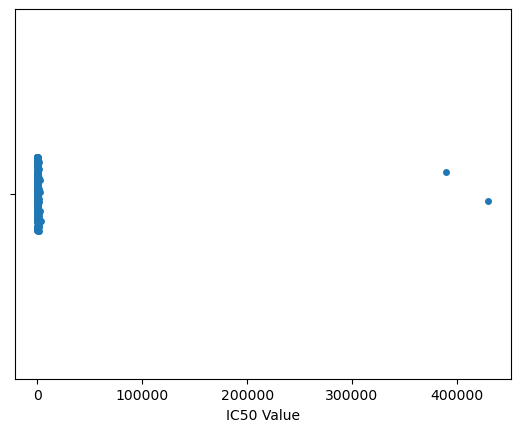

In [15]:
g = sns.stripplot(data = cox2db[ (cox2db['Molecule ChEMBL ID'] == 'CHEMBL118') &
                                 (cox2db['Standard Type'] == 'IC50')
                               ], 
                   x = "Standard Value")
g.set(xlabel='IC50 Value')

Ugh!!

The most likely reason for the very high values are wrong reported units or typos. ChEMBL provides a column with comments about data validity:

In [16]:
cox2db['Data Validity Comment'].unique()

array([nan, 'Outside typical range', 'Potential transcription error',
       'Potential missing data'], dtype=object)

Let's see which comments are in the database:

In [17]:
cox2db['Data Validity Comment'].value_counts()

Data Validity Comment
Outside typical range            409
Potential transcription error      9
Potential missing data             1
Name: count, dtype: int64

The `Data Validity Comment` column only has any contents when there is some indication that the data may be wrong. So, we can use this column to filter out obviuos outliers and dubious data. Does it get better?

[Text(0.5, 0, 'IC50 Value')]

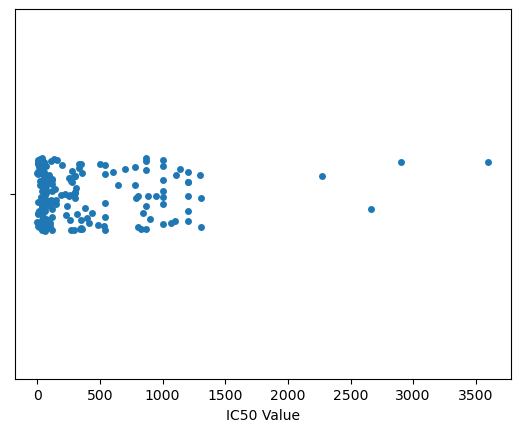

In [18]:
g = sns.stripplot(data = cox2db[ (cox2db['Molecule ChEMBL ID'] == 'CHEMBL118') &
                                 (cox2db['Standard Type'] == 'IC50') &
                                 (cox2db['Data Validity Comment'].isna())
                               ], 
                   x = "Standard Value")
g.set(xlabel='IC50 Value')

A bit better... But there's still some values that are way too high. If we remove the aberrant values above 1,000, we get:

[Text(0.5, 23.52222222222222, 'IC50 Value')]

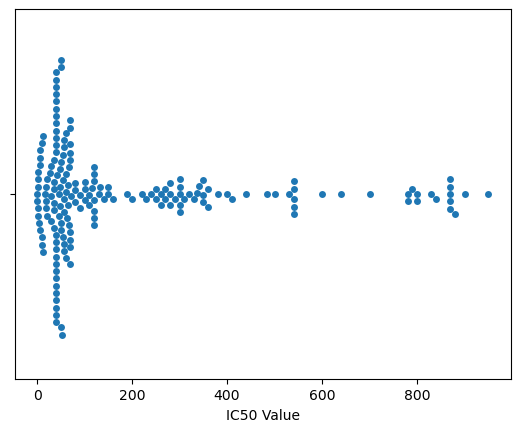

In [19]:
g = sns.swarmplot(data = cox2db[ (cox2db['Molecule ChEMBL ID'] == 'CHEMBL118') &
                                 (cox2db['Standard Type'] == 'IC50') &
                                 (cox2db['Data Validity Comment'].isna()) &
                                 (cox2db['Standard Value'] < 1000)
                               ], 
                   x = "Standard Value")
g.set(xlabel='IC50 Value')

So, what is the $IC_{50}$ for Celecoxib, after all?

As an aside, instead of the $IC_{50}s$, we can use the $-Log(IC_{50})$ value, which has less variation. Let's look at it's distribution:

<Axes: xlabel='pChEMBL Value'>

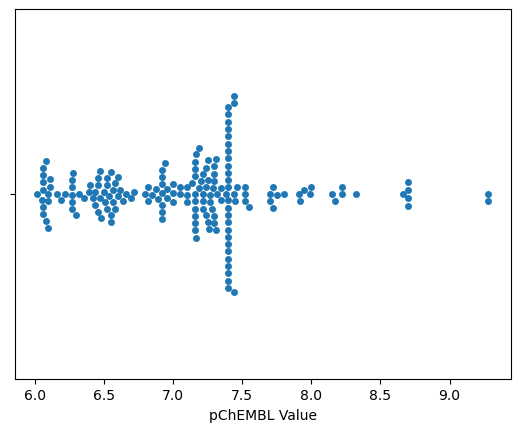

In [20]:
sns.swarmplot(data=cox2db[(cox2db['Molecule ChEMBL ID'] == 'CHEMBL118') &
                          (cox2db['Standard Type'] == 'IC50') &
                          (cox2db['Standard Relation'] == "'='") &
                          (cox2db['Data Validity Comment'].isna()) &
                          (cox2db['Standard Value'] < 1000)
                        ],
             x='pChEMBL Value')

### Inhibition

66 of the experiments report "Inhibition": 

<Axes: xlabel='Standard Value', ylabel='Count'>

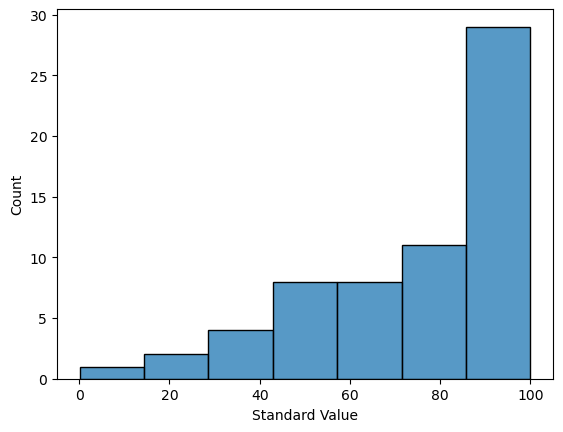

In [21]:
# Inhibition
data = cox2db[ (cox2db['Molecule ChEMBL ID'] == 'CHEMBL118') &
               (cox2db['Standard Type'] == 'Inhibition')     &
               (cox2db['Standard Units'] == '%')]

sns.histplot(data = data, x='Standard Value')

In [22]:
data["Standard Value"].describe()

count     63.000000
mean      76.037873
std       24.602662
min        0.076000
25%       60.500000
50%       83.000000
75%       96.200000
max      100.000000
Name: Standard Value, dtype: float64

### Activity

8 entries are just labeled "Activity", but the information seems meaningless. They are probably relative to some other compound, not shown here. That means those numbers cannot be used!

<Axes: xlabel='None', ylabel='Standard Value'>

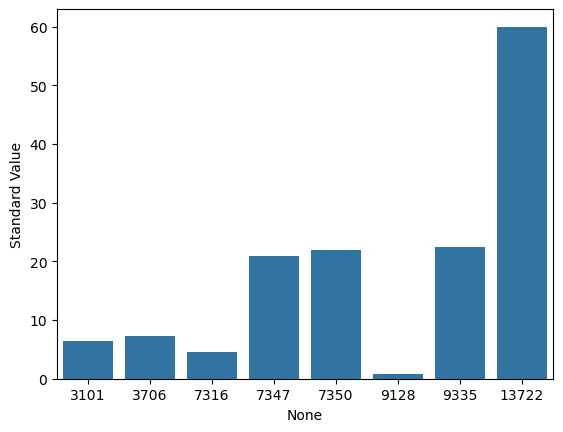

In [23]:
data = cox2db[ (cox2db['Molecule ChEMBL ID'] == 'CHEMBL118') & (cox2db['Standard Type'] == 'Activity')]
sns.barplot(data=data, x=data.index, y='Standard Value')

### $\Delta G$, $K_a$ and $K_i$

Those are usually the most precise types of data, but are harder to get. There's only 4 values in the data, and it turns out the numbers in the database are not very informative:

In [24]:
data = cox2db[ (cox2db['Molecule ChEMBL ID'] == 'CHEMBL118') &
                 ((cox2db['Standard Type'] == 'Delta G') | 
                  (cox2db['Standard Type'] == 'Ka')      |
                  (cox2db['Standard Type'] == 'Ki')
                 )]
data

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,Standard Value,Standard Units,pChEMBL Value,Data Validity Comment,Comment,Uo Units,Ligand Efficiency BEI,Ligand Efficiency LE,Ligand Efficiency LLE,Ligand Efficiency SEI,Potential Duplicate,Assay ChEMBL ID,Assay Description,Assay Type,BAO Format ID,BAO Label,Assay Organism,Assay Tissue ChEMBL ID,Assay Tissue Name,Assay Cell Type,Assay Subcellular Fraction,Assay Parameters,Assay Variant Accession,Assay Variant Mutation,Target ChEMBL ID,Target Name,Target Organism,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties,Action Type,Standard Text Value
3856,CHEMBL118,CELECOXIB,4.0,381.38,0.0,3.51,1,Cc1ccc(-c2cc(C(F)(F)F)nn2-c2ccc(S(N)(=O)=O)cc2...,Delta G,'=',0.00,kCal mol-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,CHEMBL768430,Relative free energy of binding of compound to...,B,BAO_0000357,single protein format,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CHEMBL230,Cyclooxygenase-2,Homo sapiens,SINGLE PROTEIN,CHEMBL1134800,1,Scientific Literature,Bioorg Med Chem Lett,2001.0,NaN,NaN,NaN,NaN
8232,CHEMBL118,CELECOXIB,4.0,381.38,0.0,3.51,CELECOXIB,Cc1ccc(-c2cc(C(F)(F)F)nn2-c2ccc(S(N)(=O)=O)cc2...,Ka,'=',2.15,10'4/M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,CHEMBL3380382,Binding affinity to COX-2 (unknown origin) by ...,B,BAO_0000357,single protein format,Homo sapiens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CHEMBL230,Cyclooxygenase-2,Homo sapiens,SINGLE PROTEIN,CHEMBL3351295,1,Scientific Literature,Eur J Med Chem,2014.0,NaN,NaN,NaN,NaN
8265,CHEMBL118,CELECOXIB,4.0,381.38,0.0,3.51,CELECOXIB,Cc1ccc(-c2cc(C(F)(F)F)nn2-c2ccc(S(N)(=O)=O)cc2...,Ki,NaN,NaN,NaN,NaN,NaN,Note: corresponding IC50 reported as Active,NaN,NaN,NaN,NaN,NaN,0,CHEMBL1909131,DRUGMATRIX: Cyclooxygenase COX-2 enzyme inhibi...,B,BAO_0000219,cell-based format,NaN,NaN,NaN,Sf21,NaN,NaN,NaN,NaN,CHEMBL230,Cyclooxygenase-2,Homo sapiens,SINGLE PROTEIN,CHEMBL1909046,15,DrugMatrix,NaN,NaN,CHEMBL4106362,NaN,NaN,NaN
9734,CHEMBL118,CELECOXIB,4.0,381.38,0.0,3.51,Celecoxib,Cc1ccc(-c2cc(C(F)(F)F)nn2-c2ccc(S(N)(=O)=O)cc2...,Ki,'=',0.47,nM,9.33,NaN,NaN,UO_0000065,24.46,0.49,5.82,11.96,0,CHEMBL4810382,Inhibition of human recombinant COX-2 using ar...,B,BAO_0000357,single protein format,Homo sapiens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CHEMBL230,Cyclooxygenase-2,Homo sapiens,SINGLE PROTEIN,CHEMBL4808216,1,Scientific Literature,J Med Chem,2021.0,NaN,TIME = 1.0 hr,INHIBITOR,NaN


This $K_a$ can be converted to a $\Delta G$ by 

$\Delta G = -R T Ln(K_a)$. 

Using:
- $R = 1.987 \times 10^{-3} kcal \cdot K^{−1} \cdot mol−1$
- $T = 298 K$

we get $\Delta G = -5.91 kcal/mol$ .

## Exploring the Data Types in the Full Database

In [25]:
data = cox2db['Standard Type'].value_counts()
data

Standard Type
IC50                                         7891
Inhibition                                   3315
AC50                                         1193
Ki                                            899
Activity                                      398
Ratio IC50                                    110
-log(RatioIC50)                                42
NT                                             20
Ka                                             18
% Ctrl                                         15
Enzyme inhibition                              12
Imax                                           12
Kd                                              8
% Inhibition of Control Values (Mean n=2)       8
T1/2                                            8
FC                                              5
ED50                                            4
K                                               4
Drug metabolism                                 4
Delta G                             

/scratch/local/42758336/ipykernel_664549/1226048823.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g = g.set_xticklabels(g.get_xticklabels(),rotation=90)


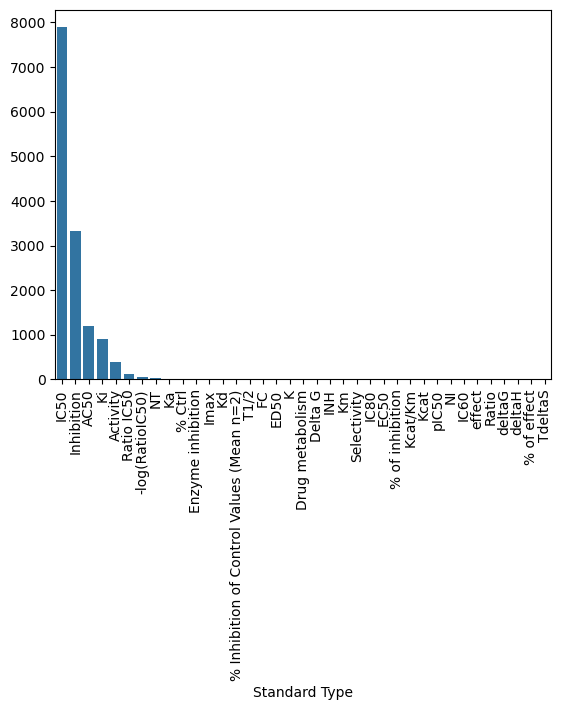

In [26]:
g = sns.barplot(x=data.index, y=data.values)
g = g.set_xticklabels(g.get_xticklabels(),rotation=90)

So, most of the data is in the form of IC50s. Some molecules also have inhibition, Ki and activity. Let's take a look at the different kinds of data. 

### $IC_{50}s$

We got lucky with Celecoxib. When we look at the full data, the IC50 data is reported in many different units:

In [27]:
data = cox2db[cox2db['Standard Type'] == 'IC50']
data['Standard Units'].value_counts()

Standard Units
nM         6882
ug.mL-1      25
%             1
ug            1
Name: count, dtype: int64

We can probably discard all that are not in nM units. Still, even if we only consider the data in 'nM', apparently there's data without values, either in 'Standard Value' or 'pChEMBL value':

In [28]:
data = data[ data['Standard Units'] == 'nM' ]
data['Standard Value'].isna().any(), data['pChEMBL Value'].isna().any()

(np.True_, np.True_)

19 entries are missing the values:

In [29]:
data['Standard Value'].isna().sum()

np.int64(19)

Also, 1 of them don't have SMILES string:

In [30]:
data['Smiles'].isna().sum()

np.int64(1)

Some were out of detection limits:

In [31]:
data['Standard Relation'].value_counts()

Standard Relation
'='     5843
'>'      964
'<'       55
'>='       1
Name: count, dtype: int64

The maximum and minimum values are also weird an $IC_{50}$ of 0 nM makes no sense:

In [32]:
data['Standard Value'].max(), data['Standard Value'].min()

(np.float64(833335724.28), np.float64(0.0))

In [33]:
data['Standard Value'].describe()

count    6.863000e+03
mean     1.061091e+06
std      1.973908e+07
min      0.000000e+00
25%      1.000000e+02
50%      1.000000e+03
75%      1.000000e+04
max      8.333357e+08
Name: Standard Value, dtype: float64

when preparing a final database, we'll need to filter those outliers.

### Inhibition

In [34]:
data = cox2db[ cox2db['Standard Type'] == 'Inhibition' ]

Some inhibitions are in $\mu M$ units, which doesn't make much sense. Let's remove those. 

In [35]:
data['Standard Units'].value_counts()

Standard Units
%     3290
uM      25
Name: count, dtype: int64

In [36]:
data = data[ data['Standard Units'] == '%' ]

Some of the values are empty:

In [37]:
data['Standard Value'].isna().any()

np.True_

In [38]:
data['Standard Value'].describe()

count    2903.000000
mean       43.445277
std        34.260686
min      -125.000000
25%        15.900000
50%        39.000000
75%        72.395000
max       158.200000
Name: Standard Value, dtype: float64

<Axes: >

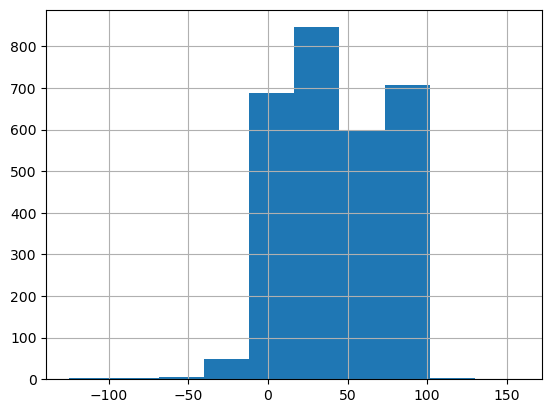

In [39]:
data['Standard Value'].hist()

What does it mean to have **negative** % inhibition????

In [40]:
data[data['Standard Value'] < 0].head()

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,Standard Value,Standard Units,pChEMBL Value,Data Validity Comment,Comment,Uo Units,Ligand Efficiency BEI,Ligand Efficiency LE,Ligand Efficiency LLE,Ligand Efficiency SEI,Potential Duplicate,Assay ChEMBL ID,Assay Description,Assay Type,BAO Format ID,BAO Label,Assay Organism,Assay Tissue ChEMBL ID,Assay Tissue Name,Assay Cell Type,Assay Subcellular Fraction,Assay Parameters,Assay Variant Accession,Assay Variant Mutation,Target ChEMBL ID,Target Name,Target Organism,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties,Action Type,Standard Text Value
33,CHEMBL18007,NaN,NaN,355.39,0.0,4.30,7,O=C1/C(=C(/O)c2ccccc2)c2ccccc2C(=O)N1Cc1ccccc1,Inhibition,'=',-3.0,%,NaN,NaN,NaN,UO_0000187,NaN,NaN,NaN,NaN,0,CHEMBL763345,Inhibitory activity against Prostaglandin G/H ...,B,BAO_0000357,single protein format,Cercopithecidae,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CHEMBL230,Cyclooxygenase-2,Homo sapiens,SINGLE PROTEIN,CHEMBL1130988,1,Scientific Literature,Bioorg Med Chem Lett,1998.0,NaN,NaN,NaN,NaN
180,CHEMBL306894,NaN,NaN,365.41,0.0,2.78,6a,CS(=O)(=O)c1ccc(-c2cc(CO[N+](=O)[O-])nn2C2CCCC...,Inhibition,'=',-125.0,%,NaN,Outside typical range,NaN,UO_0000187,NaN,NaN,NaN,NaN,0,CHEMBL761116,Evaluation for percent inhibition of recombina...,B,BAO_0000221,tissue-based format,NaN,CHEMBL3638178,Blood,NaN,NaN,NaN,NaN,NaN,CHEMBL230,Cyclooxygenase-2,Homo sapiens,SINGLE PROTEIN,CHEMBL1149153,1,Scientific Literature,J Med Chem,2004.0,NaN,NaN,NaN,NaN
501,CHEMBL177083,NaN,NaN,394.84,0.0,2.85,25,COc1ccc2c(c1)C(O)=C(C(=O)Nc1ccc(Cl)cc1)N(C)S2(...,Inhibition,'=',-9.0,%,NaN,NaN,NaN,UO_0000187,NaN,NaN,NaN,NaN,0,CHEMBL763160,Inhibition of human Prostaglandin G/H synthase...,B,BAO_0000357,single protein format,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CHEMBL230,Cyclooxygenase-2,Homo sapiens,SINGLE PROTEIN,CHEMBL1129978,1,Scientific Literature,J Med Chem,1997.0,NaN,NaN,NaN,NaN
642,CHEMBL367970,NaN,NaN,417.87,0.0,3.33,68,CN1C(C(=O)Nc2ccccc2)=C(O)c2c(c3cc(Cl)ccc3n2C)S...,Inhibition,'=',-3.0,%,NaN,NaN,NaN,UO_0000187,NaN,NaN,NaN,NaN,0,CHEMBL763159,Inhibition of human Prostaglandin G/H synthase...,B,BAO_0000357,single protein format,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CHEMBL230,Cyclooxygenase-2,Homo sapiens,SINGLE PROTEIN,CHEMBL1129978,1,Scientific Literature,J Med Chem,1997.0,NaN,NaN,NaN,NaN
672,CHEMBL4872569,NaN,NaN,315.35,0.0,2.43,5b,Cc1cc(-c2cccnc2)nn1S(=O)(=O)Oc1ccccc1,Inhibition,'=',-2.0,%,NaN,NaN,NaN,UO_0000187,NaN,NaN,NaN,NaN,0,CHEMBL4810972,Inhibition of human recombinant COX-2 assessed...,B,BAO_0000357,single protein format,Homo sapiens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CHEMBL230,Cyclooxygenase-2,Homo sapiens,SINGLE PROTEIN,CHEMBL4808246,1,Scientific Literature,Bioorg Med Chem,2021.0,NaN,Dose = 0.1 microM | TIME = 1.033 hr,NaN,NaN


A look at the source for the second entry reveals that this compound can actually be considered an activator of COX-2!!
 - ChEMBL Document [CHEMBL1149153](https://www.ebi.ac.uk/chembl/document_report_card/CHEMBL1149153/)
 - J. Med. Chem. 2004, 47, 9, 2180–2193 [here](https://pubs.acs.org/doi/10.1021/jm030276s)
 
 
That means that, to use inhibitions, we should also remove data vith inhibition < 0. 

**Exercise:** Check the presence of valid dat and SMILES.

### $AC_{50}s$

The third in the list is the concentration for half-maximal activity, $AC_{50}$:

In [41]:
data = cox2db[cox2db['Standard Type'] == 'AC50']
data['Standard Units'].value_counts()

Standard Units
nM    1193
Name: count, dtype: int64

So, they are all in the same units, which is good. However, some are missing the 'pChEMBL value':

In [42]:
data['Standard Value'].isna().any(), data['pChEMBL Value'].isna().any()

(np.False_, np.True_)

There's also a weird variation in values:

In [43]:
data['Standard Value'].max(), data['Standard Value'].min()

(np.float64(1000000.0), np.float64(48.4))

In [44]:
data['Standard Value'].describe()

count       1193.000000
mean       27801.344091
std        41885.943446
min           48.400000
25%        10000.000000
50%        30000.000000
75%        30000.000000
max      1000000.000000
Name: Standard Value, dtype: float64

<Axes: xlabel='Standard Value', ylabel='Count'>

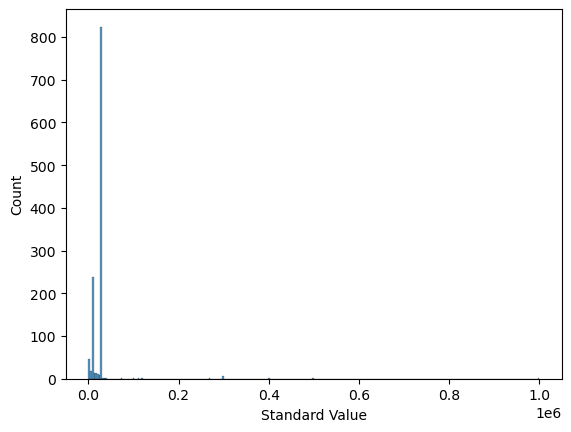

In [45]:
sns.histplot(data = data, x='Standard Value')

Again, Ugh! The very large values are likely "inactive" molecules, where the data is reported just as _greater than_ some detection limit $X$ 

In [46]:
data["Standard Relation"].value_counts()

Standard Relation
'>'    1052
'='     141
Name: count, dtype: int64

So, only about 141 points with real numbers.

### $K_i$

Next, lets look at $K_i$, with 899 entries.

In [47]:
data = cox2db[ cox2db['Standard Type'] == 'Ki' ]

From those, most have no value reported, because the dose-response curve could not be determined:

In [48]:
data['Standard Value'].isna().sum()

np.int64(871)

In [49]:
data.head(1)

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,Standard Value,Standard Units,pChEMBL Value,Data Validity Comment,Comment,Uo Units,Ligand Efficiency BEI,Ligand Efficiency LE,Ligand Efficiency LLE,Ligand Efficiency SEI,Potential Duplicate,Assay ChEMBL ID,Assay Description,Assay Type,BAO Format ID,BAO Label,Assay Organism,Assay Tissue ChEMBL ID,Assay Tissue Name,Assay Cell Type,Assay Subcellular Fraction,Assay Parameters,Assay Variant Accession,Assay Variant Mutation,Target ChEMBL ID,Target Name,Target Organism,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties,Action Type,Standard Text Value
0,CHEMBL1200623,ETHYLESTRENOL,4.0,288.48,1.0,5.09,ETHYLESTRENOL,CC[C@]1(O)CC[C@H]2[C@@H]3CCC4=CCCC[C@@H]4[C@H]...,Ki,NaN,NaN,NaN,NaN,NaN,Not Active (inhibition < 50% @ 10 uM and thus ...,NaN,NaN,NaN,NaN,NaN,0,CHEMBL1909131,DRUGMATRIX: Cyclooxygenase COX-2 enzyme inhibi...,B,BAO_0000219,cell-based format,NaN,NaN,NaN,Sf21,NaN,NaN,NaN,NaN,CHEMBL230,Cyclooxygenase-2,Homo sapiens,SINGLE PROTEIN,CHEMBL1909046,15,DrugMatrix,NaN,NaN,CHEMBL4106362,NaN,NaN,NaN


In [50]:
print(data.loc[0]['Comment'])

Not Active (inhibition < 50% @ 10 uM and thus dose-reponse curve not measured)


Ant those that have a value reported include a range of different data. Some of the data are only " > " a certain threshold, indicating not active. 

In [51]:
data[data['Standard Value'].notna()]['Standard Relation'].value_counts()

Standard Relation
'='    26
'>'     2
Name: count, dtype: int64

Also, some have $K_i = 0$:

### Activity
Activity, which is listed for 398 cases:

In [52]:
data = cox2db[ cox2db['Standard Type'] == 'Activity' ]

In [53]:
data['Standard Units'].value_counts()

Standard Units
%        226
pg/ml     23
ng/ml     17
Name: count, dtype: int64

In [54]:
data[ data['Standard Units'] == 'ng/ml' ].head()

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,Standard Value,Standard Units,pChEMBL Value,Data Validity Comment,Comment,Uo Units,Ligand Efficiency BEI,Ligand Efficiency LE,Ligand Efficiency LLE,Ligand Efficiency SEI,Potential Duplicate,Assay ChEMBL ID,Assay Description,Assay Type,BAO Format ID,BAO Label,Assay Organism,Assay Tissue ChEMBL ID,Assay Tissue Name,Assay Cell Type,Assay Subcellular Fraction,Assay Parameters,Assay Variant Accession,Assay Variant Mutation,Target ChEMBL ID,Target Name,Target Organism,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties,Action Type,Standard Text Value
1901,CHEMBL3809156,NaN,NaN,406.48,0.0,-0.51,30,COC(=O)[C@H](CC(C)C)NC(=O)[C@H](Cc1ccccc1)NC(=...,Activity,'=',0.08,ng/ml,NaN,NaN,NaN,UO_0000275,NaN,NaN,NaN,NaN,0,CHEMBL3811634,Inhibition of COX2 in healthy human whole bloo...,B,BAO_0000221,tissue-based format,Homo sapiens,CHEMBL3638178,Blood,NaN,NaN,NaN,NaN,NaN,CHEMBL230,Cyclooxygenase-2,Homo sapiens,SINGLE PROTEIN,CHEMBL3808358,1,Scientific Literature,J Med Chem,2016.0,NaN,NaN,NaN,NaN
2608,CHEMBL6,INDOMETHACIN,4.0,357.79,0.0,3.93,indomethacin,COc1ccc2c(c1)c(CC(=O)O)c(C)n2C(=O)c1ccc(Cl)cc1,Activity,'=',2.10,ng/ml,NaN,NaN,NaN,UO_0000275,NaN,NaN,NaN,NaN,0,CHEMBL3811634,Inhibition of COX2 in healthy human whole bloo...,B,BAO_0000221,tissue-based format,Homo sapiens,CHEMBL3638178,Blood,NaN,NaN,NaN,NaN,NaN,CHEMBL230,Cyclooxygenase-2,Homo sapiens,SINGLE PROTEIN,CHEMBL3808358,1,Scientific Literature,J Med Chem,2016.0,NaN,NaN,NaN,NaN
3784,CHEMBL4640256,NaN,NaN,414.90,0.0,2.50,10,COC(=O)[C@@H](N)Cc1cn(-c2nc(Cl)nc(N3CCCCC3)n2)...,Activity,'=',0.45,ng/ml,NaN,NaN,NaN,UO_0000275,NaN,NaN,NaN,NaN,0,CHEMBL4610813,Inhibition of LPS-activated COX2 in human whol...,B,BAO_0000221,tissue-based format,Homo sapiens,CHEMBL3638178,Blood,NaN,NaN,NaN,NaN,NaN,CHEMBL230,Cyclooxygenase-2,Homo sapiens,SINGLE PROTEIN,CHEMBL4610009,1,Scientific Literature,Bioorg Med Chem,2020.0,NaN,NaN,NaN,NaN
3785,CHEMBL6,INDOMETHACIN,4.0,357.79,0.0,3.93,Indomethacin,COc1ccc2c(c1)c(CC(=O)O)c(C)n2C(=O)c1ccc(Cl)cc1,Activity,'=',0.98,ng/ml,NaN,NaN,NaN,UO_0000275,NaN,NaN,NaN,NaN,0,CHEMBL4610813,Inhibition of LPS-activated COX2 in human whol...,B,BAO_0000221,tissue-based format,Homo sapiens,CHEMBL3638178,Blood,NaN,NaN,NaN,NaN,NaN,CHEMBL230,Cyclooxygenase-2,Homo sapiens,SINGLE PROTEIN,CHEMBL4610009,1,Scientific Literature,Bioorg Med Chem,2020.0,NaN,NaN,NaN,NaN
4287,CHEMBL4164251,NaN,NaN,320.74,0.0,1.21,2,Nc1nc(Cl)nc(Nc2ccc(N3CCOCC3=O)cc2)n1,Activity,'=',1.14,ng/ml,NaN,NaN,NaN,UO_0000275,NaN,NaN,NaN,NaN,0,CHEMBL4151940,Inhibition of COX2 in human whole blood assess...,B,BAO_0000357,single protein format,Homo sapiens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CHEMBL230,Cyclooxygenase-2,Homo sapiens,SINGLE PROTEIN,CHEMBL4145689,1,Scientific Literature,J Med Chem,2018.0,NaN,NaN,NaN,NaN


This is a relly hard data to analyze. Looking at one document [here](https://pubs.acs.org/doi/10.1021/acs.jmedchem.8b00922), we see that the data listed as "inhibition" actually is the . _"Inhibition of TxB2 during Calcium-Ionophore Stimulation and Inhibition of PGE2 during LPS-Stimulation of Human Whole Blood"_, at the compound concentration of 1 μM.

The only way to use this data is by looking at each article case-by-case! However, the same papers can also have IC50s for the molecules, so we can use that instead.

# Build Database

There are a total of 8,545 compounds wth unique SMILES in the database. However, the database actually has:

- 7891 entries for $IC_{50}$ (which seems to be the most complete type of data). 
- 3315 entries with "Inhibition" data
- 1193 with "$AC_{50}$s"
- 899 with $K_i$ data, from which only 25 acctually have any data to it.
- 398 with "Activity" data.

Let's create a database with only useful data. It is likely that we can get *some* data on all molecules by using a combination of these.

## Columns
There's a large number of columns, with all kinds of data in the database:

In [55]:
cox2db.columns

Index(['Molecule ChEMBL ID', 'Molecule Name', 'Molecule Max Phase',
       'Molecular Weight', '#RO5 Violations', 'AlogP', 'Compound Key',
       'Smiles', 'Standard Type', 'Standard Relation', 'Standard Value',
       'Standard Units', 'pChEMBL Value', 'Data Validity Comment', 'Comment',
       'Uo Units', 'Ligand Efficiency BEI', 'Ligand Efficiency LE',
       'Ligand Efficiency LLE', 'Ligand Efficiency SEI', 'Potential Duplicate',
       'Assay ChEMBL ID', 'Assay Description', 'Assay Type', 'BAO Format ID',
       'BAO Label', 'Assay Organism', 'Assay Tissue ChEMBL ID',
       'Assay Tissue Name', 'Assay Cell Type', 'Assay Subcellular Fraction',
       'Assay Parameters', 'Assay Variant Accession', 'Assay Variant Mutation',
       'Target ChEMBL ID', 'Target Name', 'Target Organism', 'Target Type',
       'Document ChEMBL ID', 'Source ID', 'Source Description',
       'Document Journal', 'Document Year', 'Cell ChEMBL ID', 'Properties',
       'Action Type', 'Standard Text Value'],
 

That's a lot of columns, and not all are necessary. Let's keep only a selection of these:

In [56]:
columns = ['Molecule ChEMBL ID', 'Molecule Name', 'Molecule Max Phase',
           'Smiles', 'Standard Type', 'Standard Relation', 'Standard Value','Standard Units']

## IC50s

Let's do some checking first. We start with the 7,891 entries with IC50 data.

**Remember that:**
- Some are reported in different units,
- some have values or SMILES missing,
- Some are only annotated as _"larger than"_ or _"smaller than"_ some threshold
- Some have `Data Validity Comment`s indicating the data may be problematic

We will need to remove all those cases.

Lets start only with data for which we have:
1. Measured IC50 values in units of nM
1. There is a Smiles value
1. Have no warnings on data value

In [58]:
ic50_data = cox2db[ (cox2db['Standard Type']     == 'IC50')  &
                    (cox2db['Standard Relation'] ==  "'='")  &
                    (cox2db['Standard Units']    ==  'nM' )  &
                    (cox2db['Smiles'].notna()             )  &
                    (cox2db['Data Validity Comment'].isna()) ][columns]

print("Total number of entries that match the criteria:", len(ic50_data))
print("Number of entries with unique SMILES strings:   ", len(ic50_data['Smiles'].unique()))
print("Do the number of unique SMILES match the number of unique ChEMBL IDs?", 
      len(ic50_data['Smiles'].unique()) == len(ic50_data['Molecule ChEMBL ID'].unique()))

Total number of entries that match the criteria: 5571
Number of entries with unique SMILES strings:    4011
Do the number of unique SMILES match the number of unique ChEMBL IDs? True


### Wisdom of the crowd

There are a total of 5,571 entries that match the criteria, but only 4,011 unique molecules. That means there a lot of molecules appear more than once (remember Celecoxib?). If the values vary so much, how do we choose the correct one?

We *could* just average the values, but that may be skewed by outliers. Here, we will use the *Wisdom of the Crowd* idea: for each molecule, we will choose the **most common** value (`mode`).

In [59]:
# This creates a new DataFrame to hold unique entries, and use the `mode` of IC50s for that molecule as the value.
cox2_ic50s = pd.DataFrame(columns=columns)
for  ic50_data_line in tqdm(ic50_data['Molecule ChEMBL ID'].unique()):
    new_row =  ic50_data[ ic50_data['Molecule ChEMBL ID'] ==  ic50_data_line].mode().head(1).copy(deep=True)
    cox2_ic50s = pd.concat([cox2_ic50s,new_row])
cox2_ic50s.shape

  0%|          | 0/4011 [00:00<?, ?it/s]/scratch/local/42758336/ipykernel_664549/66569010.py:5: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  cox2_ic50s = pd.concat([cox2_ic50s,new_row])
100%|██████████| 4011/4011 [00:08<00:00, 453.43it/s]


(4011, 8)

In [60]:
cox2_ic50s.head()

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Smiles,Standard Type,Standard Relation,Standard Value,Standard Units
0,CHEMBL416126,NaN,NaN,CS(=O)(=O)c1ccc(-c2cc(F)c(F)cc2-c2ccc3c(c2)OCO...,IC50,'=',12.00,nM
0,CHEMBL143776,NaN,NaN,Fc1ccc(-c2[nH]c(-c3ccc(F)cc3)c3c2C2CCC3C2)cc1,IC50,'=',0.08,nM
0,CHEMBL322276,NaN,NaN,CC1(C)OC(=O)C(Oc2ccc3[nH]ccc3c2)=C1c1ccc(S(C)(...,IC50,'=',30.00,nM
0,CHEMBL43864,NaN,NaN,Cc1ccc(-c2ccc(S(C)(=O)=O)cc2)n1C1CCCCC1,IC50,'=',520.00,nM
0,CHEMBL45090,NaN,NaN,CS(=O)(=O)c1ccc(-n2cc(C(F)(F)F)nc2-c2cc(Cl)cc(...,IC50,'=',169.82,nM


In [61]:
print("The new database has shape: ", cox2_ic50s.shape)
print("The new database has length: ", len( cox2_ic50s['Smiles'].unique() ))
print("Number of unique ChEMBL IDs: ", len( cox2_ic50s['Molecule ChEMBL ID'].unique() ))

The new database has shape:  (4011, 8)
The new database has length:  4011
Number of unique ChEMBL IDs:  4011


Finally, let's remove the temporary dataframes, to save memory:

In [ ]:
del(ic50_data, ic50_data_line)

### Activity Bit
The numerical data we have so far is good for regression. We can also add a column to represent
if the molecule is active or not, useful for classification purposes. Here, let's define a molecule
as *acctive* if the $IC_{50}$ is below 100 nM:

In [62]:
cox2_ic50s["Active"] = cox2_ic50s["Standard Value"] < 100

In [63]:
cox2_ic50s["Active"].value_counts()

Active
False    3004
True     1007
Name: count, dtype: int64

We have about 3 inactives for each active compound.

### Other Relationships

We can now go back to the other relationships, Furst, look at the molecules with a "larger than" relationship. Those were so inactive they couldn't even measure the $IC_{50}$s! 

In [64]:
ic50_lt_data = cox2db[ (cox2db['Standard Type']     == 'IC50')  &
                       (cox2db['Standard Relation'] ==  "'>'")  &
                       (cox2db['Smiles'].notna()             )  &
                       (cox2db['Data Validity Comment'].isna()) ][columns]

However, not all are unique, and some were already counted before:

In [65]:
cox2_ic50s_mols = set(cox2_ic50s['Molecule ChEMBL ID'].unique())

lt_mols = set(ic50_lt_data['Molecule ChEMBL ID'].unique())
new_mols = lt_mols - cox2_ic50s_mols
print("Total number of molecules with 'lt' relationship data:", len(ic50_lt_data))
print("Number of unique molecules with 'lt' relationship data: ", len(lt_mols) )
print("Number of those without IC50 data:", len(new_mols))

Total number of molecules with 'lt' relationship data: 910
Number of unique molecules with 'lt' relationship data:  856
Number of those without IC50 data: 811


Still, we can sue the data for 811 new molecules. Let's just set them all as inactive, and marge to the previous database.

In [66]:
ic50_lt_data.drop_duplicates(subset=['Molecule ChEMBL ID'], inplace=True)

In [67]:
for mol in tqdm(ic50_lt_data['Molecule ChEMBL ID']):
    if (mol in cox2_ic50s_mols):
        ic50_lt_data.drop( ic50_lt_data.loc[ic50_lt_data['Molecule ChEMBL ID'] == mol].index, inplace=True)

100%|██████████| 856/856 [00:00<00:00, 43074.24it/s]


In [68]:
len(ic50_lt_data)

811

Let's now set the `Active` bit of those to "False" (inactive) and merge to the database:

In [69]:
ic50_lt_data['Active'] = False
cox2_ic50s = pd.concat([cox2_ic50s,ic50_lt_data], ignore_index=True)
print(f"The IC50s database now has {len(cox2_ic50s)} unique molecules.")

The IC50s database now has 4822 unique molecules.


### $IC_{50}$s Summary

From an initial total of 13,999 entries, there were only 8,545 unique molecules. From those, only  4,011 were unique molecules with reasonably useful IC50 data.

### A quick peek at the molecules

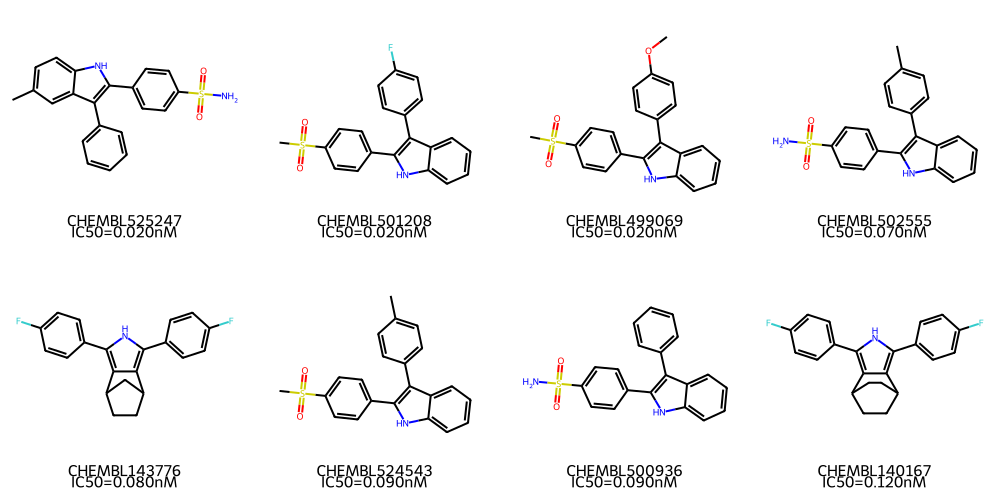

In [77]:
# A quick look at the molecules
n_to_draw = 8
df = cox2_ic50s.sort_values(by=["Standard Value"],ascending=[True]).head(n_to_draw)
PandasTools.AddMoleculeColumnToFrame(df, smilesCol='Smiles')
mols = df.ROMol.values
top_ic50s = df['Molecule ChEMBL ID'].values
legends = []
for chemblid, ic50, unit in zip(df['Molecule ChEMBL ID'].values, df['Standard Value'].values, df['Standard Units']):
    legends.append(f"{chemblid}\nIC50={ic50:.3f}{unit}") 
Draw.MolsToGridImage(mols, molsPerRow=4,subImgSize=(250,250), legends=legends)

## Other Properties

There are also some molecules with only other types of activity reported:

In [70]:
other_properties = ['Inhibition', 'AC50','Ki','Activity']

cox2_ic50s_mols = set(cox2_ic50s['Molecule ChEMBL ID'].unique())
for prop in other_properties:
    prop_data = cox2db[ (cox2db['Standard Type']     == prop)  &
                        (cox2db['Standard Relation'] ==  "'='")  &
                        (cox2db['Smiles'].notna()             )  &
                        (cox2db['Data Validity Comment'].isna()) ][columns]
    print(f"Number of entries with data as {prop}: {len(prop_data)}")
    prop_mols = set(prop_data['Molecule ChEMBL ID'].unique())
    new_mols = prop_mols - cox2_ic50s_mols
    print("Number of those without IC50 data:", len(new_mols))
    print("-"*60)

Number of entries with data as Inhibition: 2666
Number of those without IC50 data: 1233
------------------------------------------------------------
Number of entries with data as AC50: 136
Number of those without IC50 data: 117
------------------------------------------------------------
Number of entries with data as Ki: 26
Number of those without IC50 data: 2
------------------------------------------------------------
Number of entries with data as Activity: 263
Number of those without IC50 data: 132
------------------------------------------------------------


It looks like we can recover some more data using those measures.

<div class="alert alert-info" role="alert">
    <b>Exercise:</b> Try to gather more data from those other measures and enrich your database.
</div>

## Pre-process database

Now we need to pre-process the database, to:

1. Remove molecules that contain atoms other than ['C','N','O','H','S','P','As','Se','F','Cl','Br','I']
1. Standardize (remove salts, etc.)
1. Reset the SMILES from the ROMol objects
1. Remove duplicates

This process involves a number of functions. To make it easier, we collect all those functions
in an external file (`utils/preprocess.py`), and just import it here.

<div class="alert alert-warning" role="alert">
    <b>Question:</b> Why didn't we do this earlier?
</div>

In [71]:
# -- Preprocessing Tools
from utils import preprocess

In [72]:
clean_df, dup_df = preprocess.preprocess_db(cox2_ic50s, smiles_col='Smiles')

Generating InChI Keys: 100%|██████████| 4789/4789 [00:02<00:00, 2391.29it/s]


So, the there were 52 molecules with atoms other than ['C','N','O','H','S','P','As','Se','F','Cl','Br','I']. Other than that, all was fine.

In [73]:
cox2_ic50s.shape, clean_df.shape, dup_df.shape

((4822, 11), (4789, 11), (0, 0))

In [74]:
clean_df.columns

Index(['Molecule ChEMBL ID', 'Molecule Name', 'Molecule Max Phase',
       'Standard Type', 'Standard Relation', 'Standard Value',
       'Standard Units', 'Active', 'ROMol', 'Smiles', 'InChI Key'],
      dtype='object')

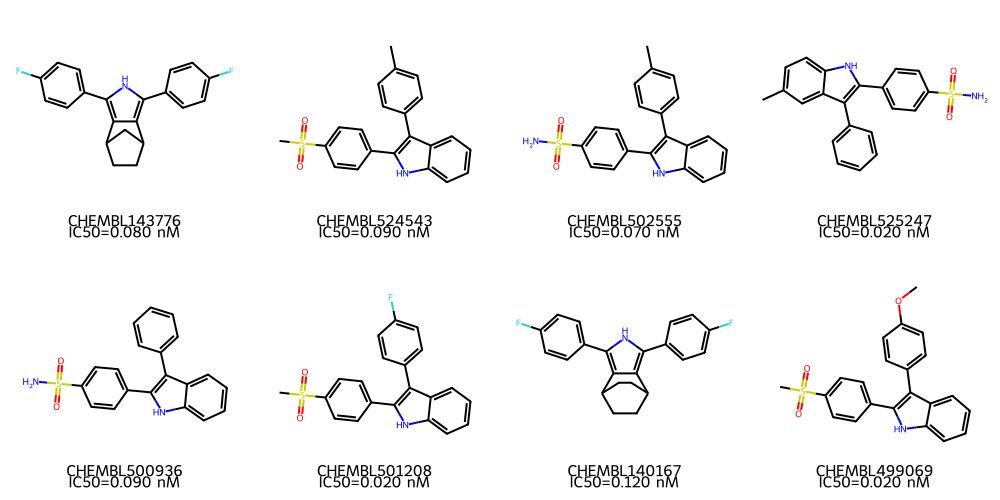

In [78]:
# A quick look at the molecules
n_to_draw = 8
df = clean_df[ clean_df['Molecule ChEMBL ID'].isin(top_ic50s) ]
mols = df.ROMol.values
legends = []
for chemblid, ic50, unit in zip(df['Molecule ChEMBL ID'].values, df['Standard Value'].values, df['Standard Units'].values):
    legends.append(f"{chemblid}\nIC50={ic50:.3f} {unit}") 
Draw.MolsToGridImage(mols, molsPerRow=4,subImgSize=(250,250), legends=legends)

In [79]:
cox2_ic50s = clean_df.copy(deep=True)

We no longer need these other databases, let's remove them.

In [80]:
del(clean_df,dup_df)

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Standard Type,Standard Relation,Standard Value,Standard Units,Active,ROMol,Smiles,InChI Key
1533,CHEMBL1078376,NaN,NaN,IC50,'=',12030.0,nM,False,,Cc1ccc(Nc2cnccc2NS(C)(=O)=O)cc1,QUVHDJSZHHKWSL-WYUMXYHSNA-N
4096,CHEMBL1689435,ETHANESULFONYLHYDROXAMIC ACID,NaN,IC50,'>',100000.0,nM,False,,CCS(=O)(=O)NO,NZZOAMPXUAJBIA-UHFFFAOYNA-N
3507,CHEMBL4072942,NaN,NaN,IC50,'=',1860.0,nM,False,,c1ccc(-n2nccc2-c2ccc(Nc3nc(N4CCCCC4)nc(N4CCCCC...,VVQZMIKHELEROZ-SREBMQDQNA-N
3220,CHEMBL3264696,NaN,NaN,IC50,'=',5210.0,nM,False,,Fc1ccc(-n2cc(CSc3nc4ccccc4o3)nn2)cc1,IKKBSTHJSYHHHQ-UHFFFAOYNA-N
1381,CHEMBL502799,NaN,NaN,IC50,'=',2200.0,nM,False,,CC(=O)O[C@@]12[C@H](OC(=O)[C@@H](C(C)C)N(C)C)[...,NNQZZZKSYAIGAN-XUSXYMRCNA-N

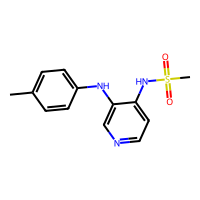
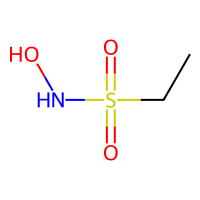
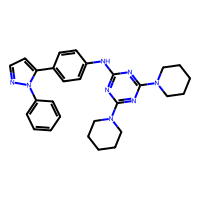
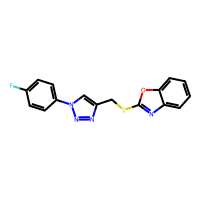
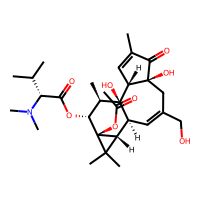

In [81]:
cox2_ic50s.sample(5)

In [82]:
len(cox2_ic50s)

4789

In [83]:
len(cox2_ic50s['Molecule ChEMBL ID'].unique())

4789

## Save database

# Example: A Random Forest Classifier

As a usage example, let's build a simple Random Forest Classifier to determine if a molecule is active against COX-2 or not.

## Featurize the Molecules
To create a model, we will need to add features to the molecules. Here, let's use the molecular fingerprint as features.

In [84]:
fpgen = AllChem.GetMorganGenerator(radius=3,fpSize=2048)

In [85]:
cox2_ic50s['MorganFP'] = [fpgen.GetFingerprintAsNumPy(x) for x in cox2_ic50s.ROMol]

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Standard Type,Standard Relation,Standard Value,Standard Units,Active,ROMol,Smiles,InChI Key,MorganFP
0,CHEMBL416126,NaN,NaN,IC50,'=',12.00,nM,True,,CS(=O)(=O)c1ccc(-c2cc(F)c(F)cc2-c2ccc3c(c2)OCO...,GARKKXFHXDZJSG-UHFFFAOYNA-N,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,CHEMBL143776,NaN,NaN,IC50,'=',0.08,nM,True,,Fc1ccc(-c2[nH]c(-c3ccc(F)cc3)c3c2C2CCC3C2)cc1,BVZXSBMLTOYNIL-UHFFFAOYNA-N,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,CHEMBL322276,NaN,NaN,IC50,'=',30.00,nM,True,,CC1(C)OC(=O)C(Oc2ccc3[nH]ccc3c2)=C1c1ccc(S(C)(...,QXPOHFKFFDZLPM-UHFFFAOYNA-N,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,CHEMBL43864,NaN,NaN,IC50,'=',520.00,nM,False,,Cc1ccc(-c2ccc(S(C)(=O)=O)cc2)n1C1CCCCC1,ODRFJVIOUFCXSN-UHFFFAOYNA-N,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,CHEMBL45090,NaN,NaN,IC50,'=',169.82,nM,False,,CS(=O)(=O)c1ccc(-n2cc(C(F)(F)F)nc2-c2cc(Cl)cc(...,MQWARLALXCOJKW-UHFFFAOYNA-N,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."

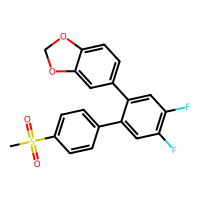
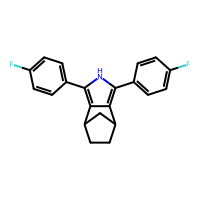
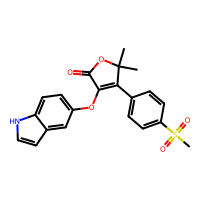
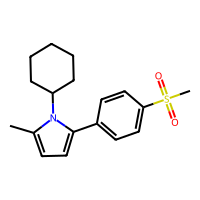
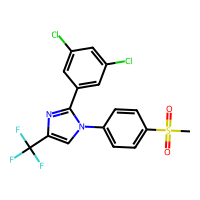

In [86]:
cox2_ic50s.head()

## Split the dataset

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
X, y = cox2_ic50s.MorganFP.values.tolist(), cox2_ic50s.Active.values.tolist()

In [89]:
len(X), len(y)

(4789, 4789)

Let's use 80% of the molecules for training, and test the model with the remaining 20%:

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.30,
                                                    random_state=42,
                                                    shuffle=True,
                                                    stratify=y)

In [91]:
print('Training set: ', len(X_train))
print('Testing set:  ', len(X_test))

Training set:  3352
Testing set:   1437


In [92]:
values,counts = np.unique(y_train, return_counts=True)
for value, count in zip(values, counts):
    print(f"Active? {value!s:5}: {count: 6d}")
print(f"Proportion of inactive molecules in the training set: {counts[0]/(counts[0] + counts[1]):0.2f}")

Active? False:   2647
Active? True :    705
Proportion of inactive molecules in the training set: 0.79


In [93]:
values,counts = np.unique(y_test, return_counts=True)
for value, count in zip(values, counts):
    print(f"Active? {value!s:5}: {count: 6d}")
print(f"Proportion of inactive molecules in the testing set: {counts[0]/(counts[0] + counts[1]):0.2%}")

Active? False:   1135
Active? True :    302
Proportion of inactive molecules in the testing set: 78.98%


## Train the model

For this example, we will use a simple Random Forest. This is always a good baseline: Any model you create should be at least as good as a Random Forest.

In [94]:
from sklearn.ensemble import RandomForestClassifier

In [95]:
clf = RandomForestClassifier(random_state=42)

In [96]:
clf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [97]:
y_pred = clf.predict(X_test)

## Test the Model

In [98]:
from sklearn import metrics

In [99]:
print(f"Accuracy:  {metrics.accuracy_score(y_test, y_pred):.2f}")
print(f"F1-Score:  {metrics.f1_score(y_test, y_pred):.2f}")
print(f"Precision: {metrics.precision_score(y_test, y_pred):.2f}")
print(f"Recall:    {metrics.recall_score(y_test, y_pred):.2f}" )
print(f"ROC_AUC:   {metrics.roc_auc_score(y_test, y_pred):.2f}" )

Accuracy:  0.86
F1-Score:  0.62
Precision: 0.76
Recall:    0.52
ROC_AUC:   0.74


Not a bad model, huh? Especially considering there we did not optimize any hyperparamters!

<div class="alert alert-success" role="alert">
    <b>That's it for today</b> </br>
    As an exercise, see if you can get a better model by adding more data from the other measures or adjusting hyperparameters!
</div>